Exercise to explore the relationship between Algerian Forest Fires in two of its regions against the level of humidity and temperature and makes predictions of FFMC based on relative humidity. 

In [335]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

Examine the relationship between specific variables and forest fires in Algeria

1. Humidity and Temperature in 2 Different Regions of Algeria

In [283]:
#load data
forests = pd.read_csv(r'C:\Users\Ilana\Dropbox\Careers\Data Analytics\Portfolio\Regression\Algerian_forest_fires_dataset_UPDATE.csv')

In [284]:
forests.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset


In [285]:
forests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [286]:
forests.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Preprocessing

In [287]:
#temp (Temperature)     , humid  (RH)    , rain, FFMC , DMC , DC , ISI , BUI , FWI, region , fire 
forests = forests.drop(['day', 'month', 'year'], axis=1)

forests.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset


In [288]:
# Remove leading/trailing spaces from column names and rename
forests.columns = forests.columns.str.strip()

forests.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset


In [289]:
forests.rename(columns={'Temperature': 'temp', 'RH': 'humid', 'Ws': 'wind', 'Rain': 'rain', 'Classes': 'fire', 'Region': 'region'}, inplace=True)

In [290]:
forests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    244 non-null    int64  
 1   humid   244 non-null    int64  
 2   wind    244 non-null    int64  
 3   rain    244 non-null    float64
 4   FFMC    244 non-null    float64
 5   DMC     244 non-null    float64
 6   DC      244 non-null    object 
 7   ISI     244 non-null    float64
 8   BUI     244 non-null    float64
 9   FWI     244 non-null    object 
 10  fire    243 non-null    object 
 11  region  244 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 23.0+ KB


Convert DC and FWI to float and fire to boolean

In [291]:
# Convert 'DC' and 'FWI' to float
forests['DC'] = pd.to_numeric(forests['DC'], errors='coerce')
forests['FWI'] = pd.to_numeric(forests['FWI'], errors='coerce')


forests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    244 non-null    int64  
 1   humid   244 non-null    int64  
 2   wind    244 non-null    int64  
 3   rain    244 non-null    float64
 4   FFMC    244 non-null    float64
 5   DMC     244 non-null    float64
 6   DC      243 non-null    float64
 7   ISI     244 non-null    float64
 8   BUI     244 non-null    float64
 9   FWI     243 non-null    float64
 10  fire    243 non-null    object 
 11  region  244 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 23.0+ KB


In [292]:
forests.isnull().sum()

temp      0
humid     0
wind      0
rain      0
FFMC      0
DMC       0
DC        1
ISI       0
BUI       0
FWI       1
fire      1
region    0
dtype: int64

In [293]:
# Print out the rows with missing values
rows_with_missing_values = forests[forests.isna().any(axis=1)]
print(rows_with_missing_values)

     temp  humid  wind  rain  FFMC   DMC  DC   ISI   BUI  FWI fire  \
165    37     37    18   0.2  88.9  12.9 NaN  12.5  10.4  NaN  NaN   

                            region  
165  Sidi-Bel Abbes Region Dataset  


In [294]:
# Replace <NA> with True in the 'fire' column
forests['fire'] = forests['fire'].fillna('fire')
forests['fire'] = forests['fire'].str.strip()

forests.isnull().sum()
print(forests['fire'].unique())

['not fire' 'fire']


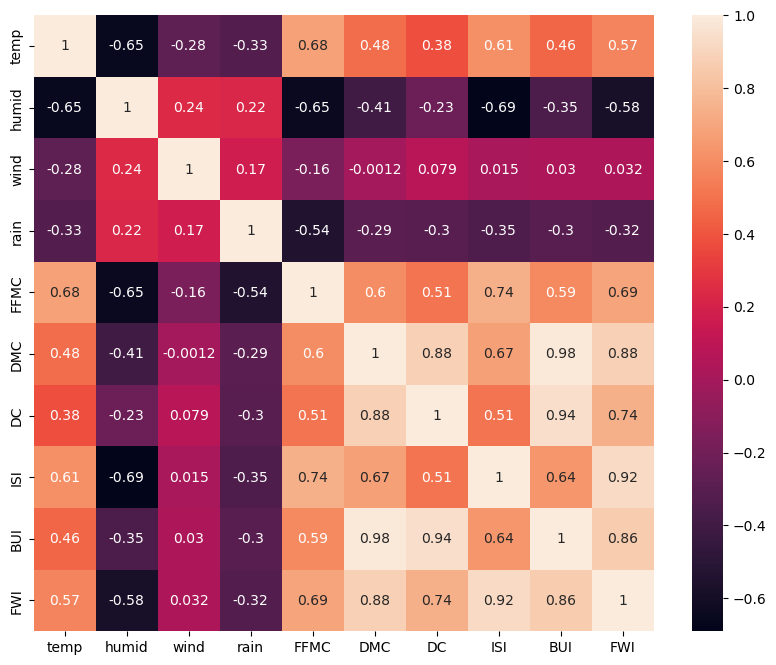

<Figure size 640x480 with 0 Axes>

In [295]:
#check multicollinearity with a heatmap
X = forests.drop(columns = ['region', 'fire'])
plt.figure(figsize=(10,8))
corr_grid = X.corr()
sns.heatmap(corr_grid, annot=True)
plt.show()
plt.clf()

high correlations = DMC & BUI, DC & BUI, ISI & FWI

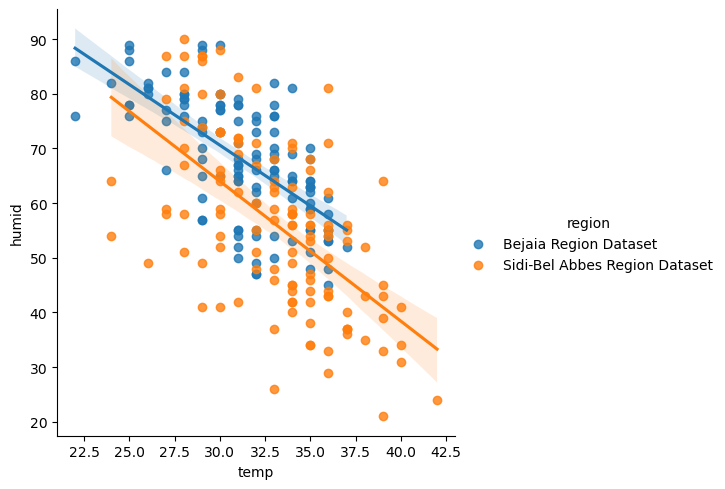

<Figure size 640x480 with 0 Axes>

In [296]:
#plot humidity vs temperature
modelH = sns.lmplot(data=forests, x='temp', y='humid', hue='region')
slope, intercept = modelH.axes.flat[0].lines[1].get_data()  # Access first subplot and second line (regression line)
# Format the equation string
# Extract slope and intercept from the model regplot (after the plot is generated)
# Convert slope and intercept to scalars before formatting (assuming they are single values)
slope = slope[0]  # Assuming slope is a single value array
intercept = intercept[0]  # Assuming intercept is a single value array
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.show()
plt.clf()

There is lower humidity but higher temperatures in Sidi while Bejala has higher humidity but lower temperatures

In [297]:
for region_value in forests['region'].unique():
    subset_data = forests[forests['region'] == region_value]
    slope, intercept = np.polyfit(subset_data['temp'], subset_data['humid'], 1)
    print(f"Region: {region_value}")
    print(f"Equation of the regression line: y = {slope:.2f} * x + {intercept:.2f}")
    print()


Region: Bejaia Region Dataset 
Equation of the regression line: y = -2.22 * x + 137.12

Region: Sidi-Bel Abbes Region Dataset
Equation of the regression line: y = -2.56 * x + 140.74



Holding all other predictors constant, for every one-unit increase in temperature in the Bejaia region, the humidity decreases by approximately 2.22 percentage points. Similarly, in the Sidi-Bel Abbes region, for every one-unit increase in temperature, the humidity decreases by approximately 2.56 percentage points.

2. Predicting FMCC (Fine Fuel Moisture Code)

In [298]:
forests['FFMC'].isnull().sum()

0

In [302]:
forests['fire'].unique()

array(['not fire', 'fire'], dtype=object)

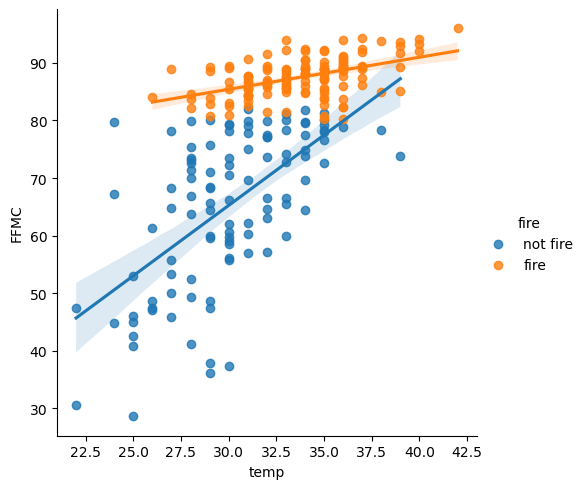

In [306]:
modelF = sns.lmplot(data=forests, x='temp', y='FFMC', hue='fire')
plt.show()

In [333]:
# Encode the 'fire' variable
le = LabelEncoder()
forests['fire_encoded'] = le.fit_transform(forests['fire'])

print(forests['fire_encoded'].unique()) # 1 = not fire, 0 = fire

# Interaction Var
forests['fire_temp'] = forests['fire_encoded'] * forests['temp']  # Create interaction term

X = forests[['temp', 'fire_encoded', 'fire_temp']]  # Select features including interaction term
y = forests['FFMC']  # Select target variable

modelF2 = LinearRegression()
modelF2.fit(X, y)


[1 0]


LinearRegression()

In [332]:
# Define feature names
feature_names = ['temp', 'fire_encoded', 'fire_temp']

# Print coefficients
print("Coefficients:")
for feature, coef in zip(X.columns, modelF2.coef_):
    print(f"{feature}: {coef:.2f}")

# Print intercept
print("\nIntercept:", modelF2.intercept_)

# Compute R-squared score
r_squared = modelF2.score(X, y)

print("\nR-squared score:", r_squared) 


Coefficients:
temp: 0.56
fire_encoded: -76.82
fire_temp: 1.89

Intercept: 68.71484725063442

R-squared score: 0.7409776007308556


In [ ]:
# Alternative approach
modelF = sm.OLS.from_formula('FFMC ~ temp + fire + temp:fire',data=forests)
resultsP = modelF.fit()
print(resultsP.params)

Intercept                68.714847
fire[T.not fire]        -76.823738
temp                      0.556793
temp:fire[T.not fire]     1.888367
dtype: float64


Holding all other predictors constant, for every one-unit increase in temperature, the FMCC increases by 0.56.  

And, when there is no fire (1), the FMCC decreases by 76.82 units. 

The combined effect of fire and temperature, increase the FMCC value bu 1.89 units.

The R-squared score is 0.74, indicating that approximately 74% of the variance in the FFMC values can be explained by the independent variables (temp, fire_encoded, and fire_temp) in the model. This suggests that the model provides a reasonably good fit to the data.

3. Predicting FFMC: Polynomial

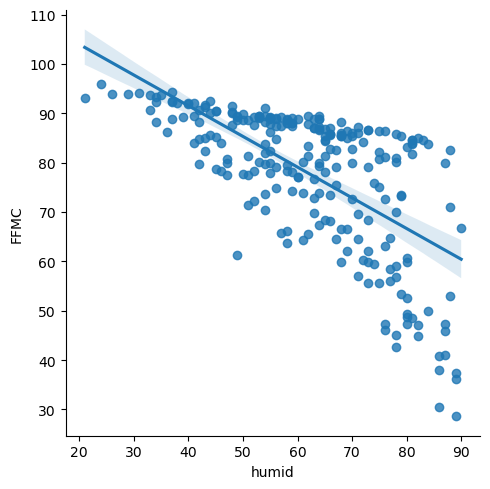

In [334]:
sns.lmplot(data=forests, x='humid', y='FFMC')
plt.show()

In [342]:
model = sm.OLS.from_formula('FFMC ~ humid + np.power(humid,2)',data=forests)
resultsP = model.fit()
print(resultsP.params)


Intercept             77.543895
humid                  0.754708
np.power(humid, 2)    -0.011437
dtype: float64


In [343]:
# Get the parameters
intercept = resultsP.params['Intercept']
coef_humid = resultsP.params['humid']
coef_humid_squared = resultsP.params['np.power(humid, 2)']

# Print the regression equation
print(f"FFMC = {intercept:.2f} + {coef_humid:.2f} * humid + {coef_humid_squared:.2f} * humid^2")

FFMC = 77.54 + 0.75 * humid + -0.01 * humid^2


In [349]:
# Predictions

def pred_humidity(humid):
    return intercept + coef_humid * humid + coef_humid_squared * (humid ** 2)

humid_25 = 25
humid_35 = 35
humid_60 = 60
humid_70  = 70

print(f"The FFMC when the humidity level is {humid_25}% is {pred_humidity(humid_25):.2f}")
print(f"The FFMC when the humidity level is {humid_35}% is {pred_humidity(humid_35):.2f}")
print(f"The FFMC when the humidity level is {humid_60}% is {pred_humidity(humid_60):.2f}")
print(f"The FFMC when the humidity level is {humid_70}% is {pred_humidity(humid_70):.2f}")



The FFMC when the humidity level is 25% is 89.26
The FFMC when the humidity level is 35% is 89.95
The FFMC when the humidity level is 60% is 81.65
The FFMC when the humidity level is 70% is 74.33


As the humidity level rises, the FFMC appears to decrease. The higher the humidity level, the more rapidly the FFMC seems to decline. This is the consequence of a polynomial relationship between humidity and FFMC.